In [19]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
FILE = "fritz.log"

In [11]:
with open(FILE) as f:
    data = f.readlines()
# parse dd.mm.yy hh:mm:ss message into three columns
data = [line.strip().split(" ", 2) for line in data]

In [15]:
# filter out messages starting as follows
msg1 = "DSL antwortet nicht (Keine DSL-Synchronisierung)."
msg2 = "Internetverbindung wurde erfolgreich hergestellt."
targets = [msg1, msg2]
data_12 = [line for line in data if line[2].startswith(tuple(targets))]
data_1 = [line for line in data_12 if line[2].startswith(msg1)]
data_2 = [line for line in data_12 if line[2].startswith(msg2)]

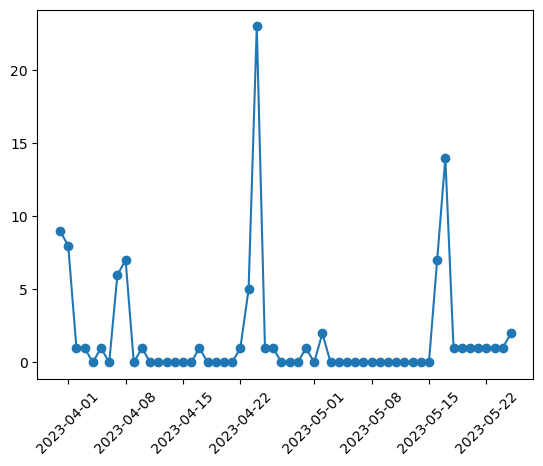

In [31]:
# plot data_1 count per day
t = [line[0] for line in data_1]
t = [datetime.datetime.strptime(line, "%d.%m.%y").date() for line in t]
def bincount(x):
    counts = {}
    for item in x:
        counts[item] = counts.get(item, 0) + 1
    return counts
c = bincount(t)

# insert zeroes for missing days
start = min(c.keys())
end = max(c.keys())
for i in range((end - start).days + 1):
    date = start + datetime.timedelta(days=i)
    c[date] = c.get(date, 0)

x = sorted(c.keys())
y = [c[key] for key in x]
_ = plt.plot(x, y, "o-")
_ = plt.xticks(rotation=45)

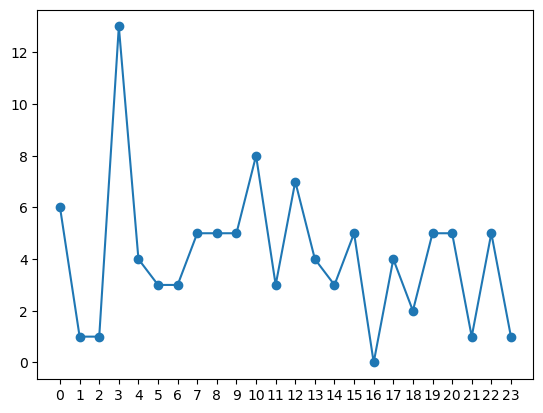

In [32]:
# now by hour of day
t = [line[1] for line in data_1]
t = [datetime.datetime.strptime(line, "%H:%M:%S").hour for line in t]
c = bincount(t)

# insert zeroes for missing hours
for i in range(24):
    c[i] = c.get(i, 0)

x = sorted(c.keys())
y = [c[key] for key in x]
_ = plt.plot(x, y, "o-")
_ = plt.xticks(range(24))

In [45]:
# now analyze time between msg1 and next msg2
durations = [] # minutes
state = ""
start, end = None, None
for line in data_12[::-1]:
    if line[2].startswith(msg1):
        if state == "msg1":
            continue
        else:
            state = "msg1"
            start = datetime.datetime.strptime(line[0] + " " + line[1], "%d.%m.%y %H:%M:%S")
    elif line[2].startswith(msg2) and state == "msg1":
        state = "msg2"
        end = datetime.datetime.strptime(line[0] + " " + line[1], "%d.%m.%y %H:%M:%S")
        durations.append((end - start).total_seconds() / 60)

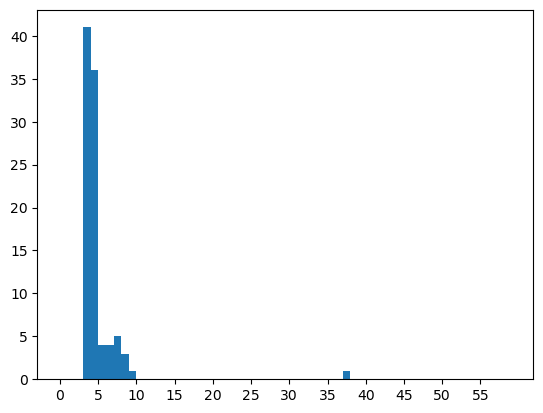

In [51]:
# plot histogram of durations
_ = plt.hist(durations, bins=range(0, 60, 1))
# ticks every 5 minutes
_ = plt.xticks(range(0, 60, 5))